## Exploring Crime Rates
By Devin de Araujo

The following notebook is an exploration into Crime Rates and GDP per Capita. It is an excerise in data munging, summarising and exploring the data through different types of visualisations.

In [ ]:
# Load packages

library('tidyverse')
library('ggplot2')
library('ggthemes')
library('gridExtra')

InlineBackend.figure_format = 'retina'

# Set plot options
options(repr.plot.width=8, repr.plot.height=8,repr.plot.res = 350, repr.plot.quality = 100)

In [2]:
# Load in data
crime_file <- 'homicide.csv'
gdp_file <- 'gdp.csv'

# 55 years of data
crime <- read.csv(crime_file, header=TRUE)
gdp <- read.csv(gdp_file, header=TRUE)

# remove X from all names in variables
names(crime) <- substring(names(crime),2,5)
names(gdp) <- substring(names(gdp),2,5)

# rename country column
colnames(crime)[1] <- "country"
colnames(gdp)[1] <- "country"


### Clean the Data

The two data sets used were downloaded from the Gapminder website<br> https://www.gapminder.org/data/

I decided to subset each data set based on the following list of 1st world countries<br> 
http://www.nationsonline.org/oneworld/first_world.htm

From previewing the data, I noticed that the date ranges were different. I decided to use a period spanning 20 years (1985 - 2005). 

In [5]:
# Subset the data based on 1st world countries list

crime_1 <- subset(crime, country == "Australia" | country == "Canada" | country == "Norway"
               | country == "Sweden" | country == "Netherlands" | country == "Belgium"
               | country == "Iceland" | country == "United States"  | country == "Japan"
               | country == "Ireland")

gdp_1 <- subset(gdp, country == "Australia" | country == "Canada" | country == "Norway"
                | country == "Sweden" | country == "Netherlands" | country == "Belgium"
                | country == "Iceland" | country == "United States"  | country == "Japan"
                | country == "Ireland")

# gather columns into rows using tidyr
crime_1 <- gather(data=crime_1, key=year, value=crime_rate, 2:57)
gdp_1 <- gather(data=gdp_1, key=year, value=income, 2:53)

#Subset again to keep years from 1985 - 2005
crime_clean <- subset(crime_1, year >= 1985 & year <=2005)
gdp_clean <- subset(gdp_1, year >= 1985 & year <=2005)

# merge the two data sets together using MERGE
df <- merge(crime_clean, gdp_clean, by=c('country', 'year'))

head(df)

country,year,crime_rate,income
Australia,1985,1.981491,15574.44
Australia,1986,1.944594,16024.03
Australia,1987,2.100435,16195.47
Australia,1988,1.985405,16832.70
Australia,1989,1.797357,17199.91
Australia,1990,2.144797,17553.38


## Plot the data

Warning message:
“Removed 11 rows containing missing values (geom_path).”

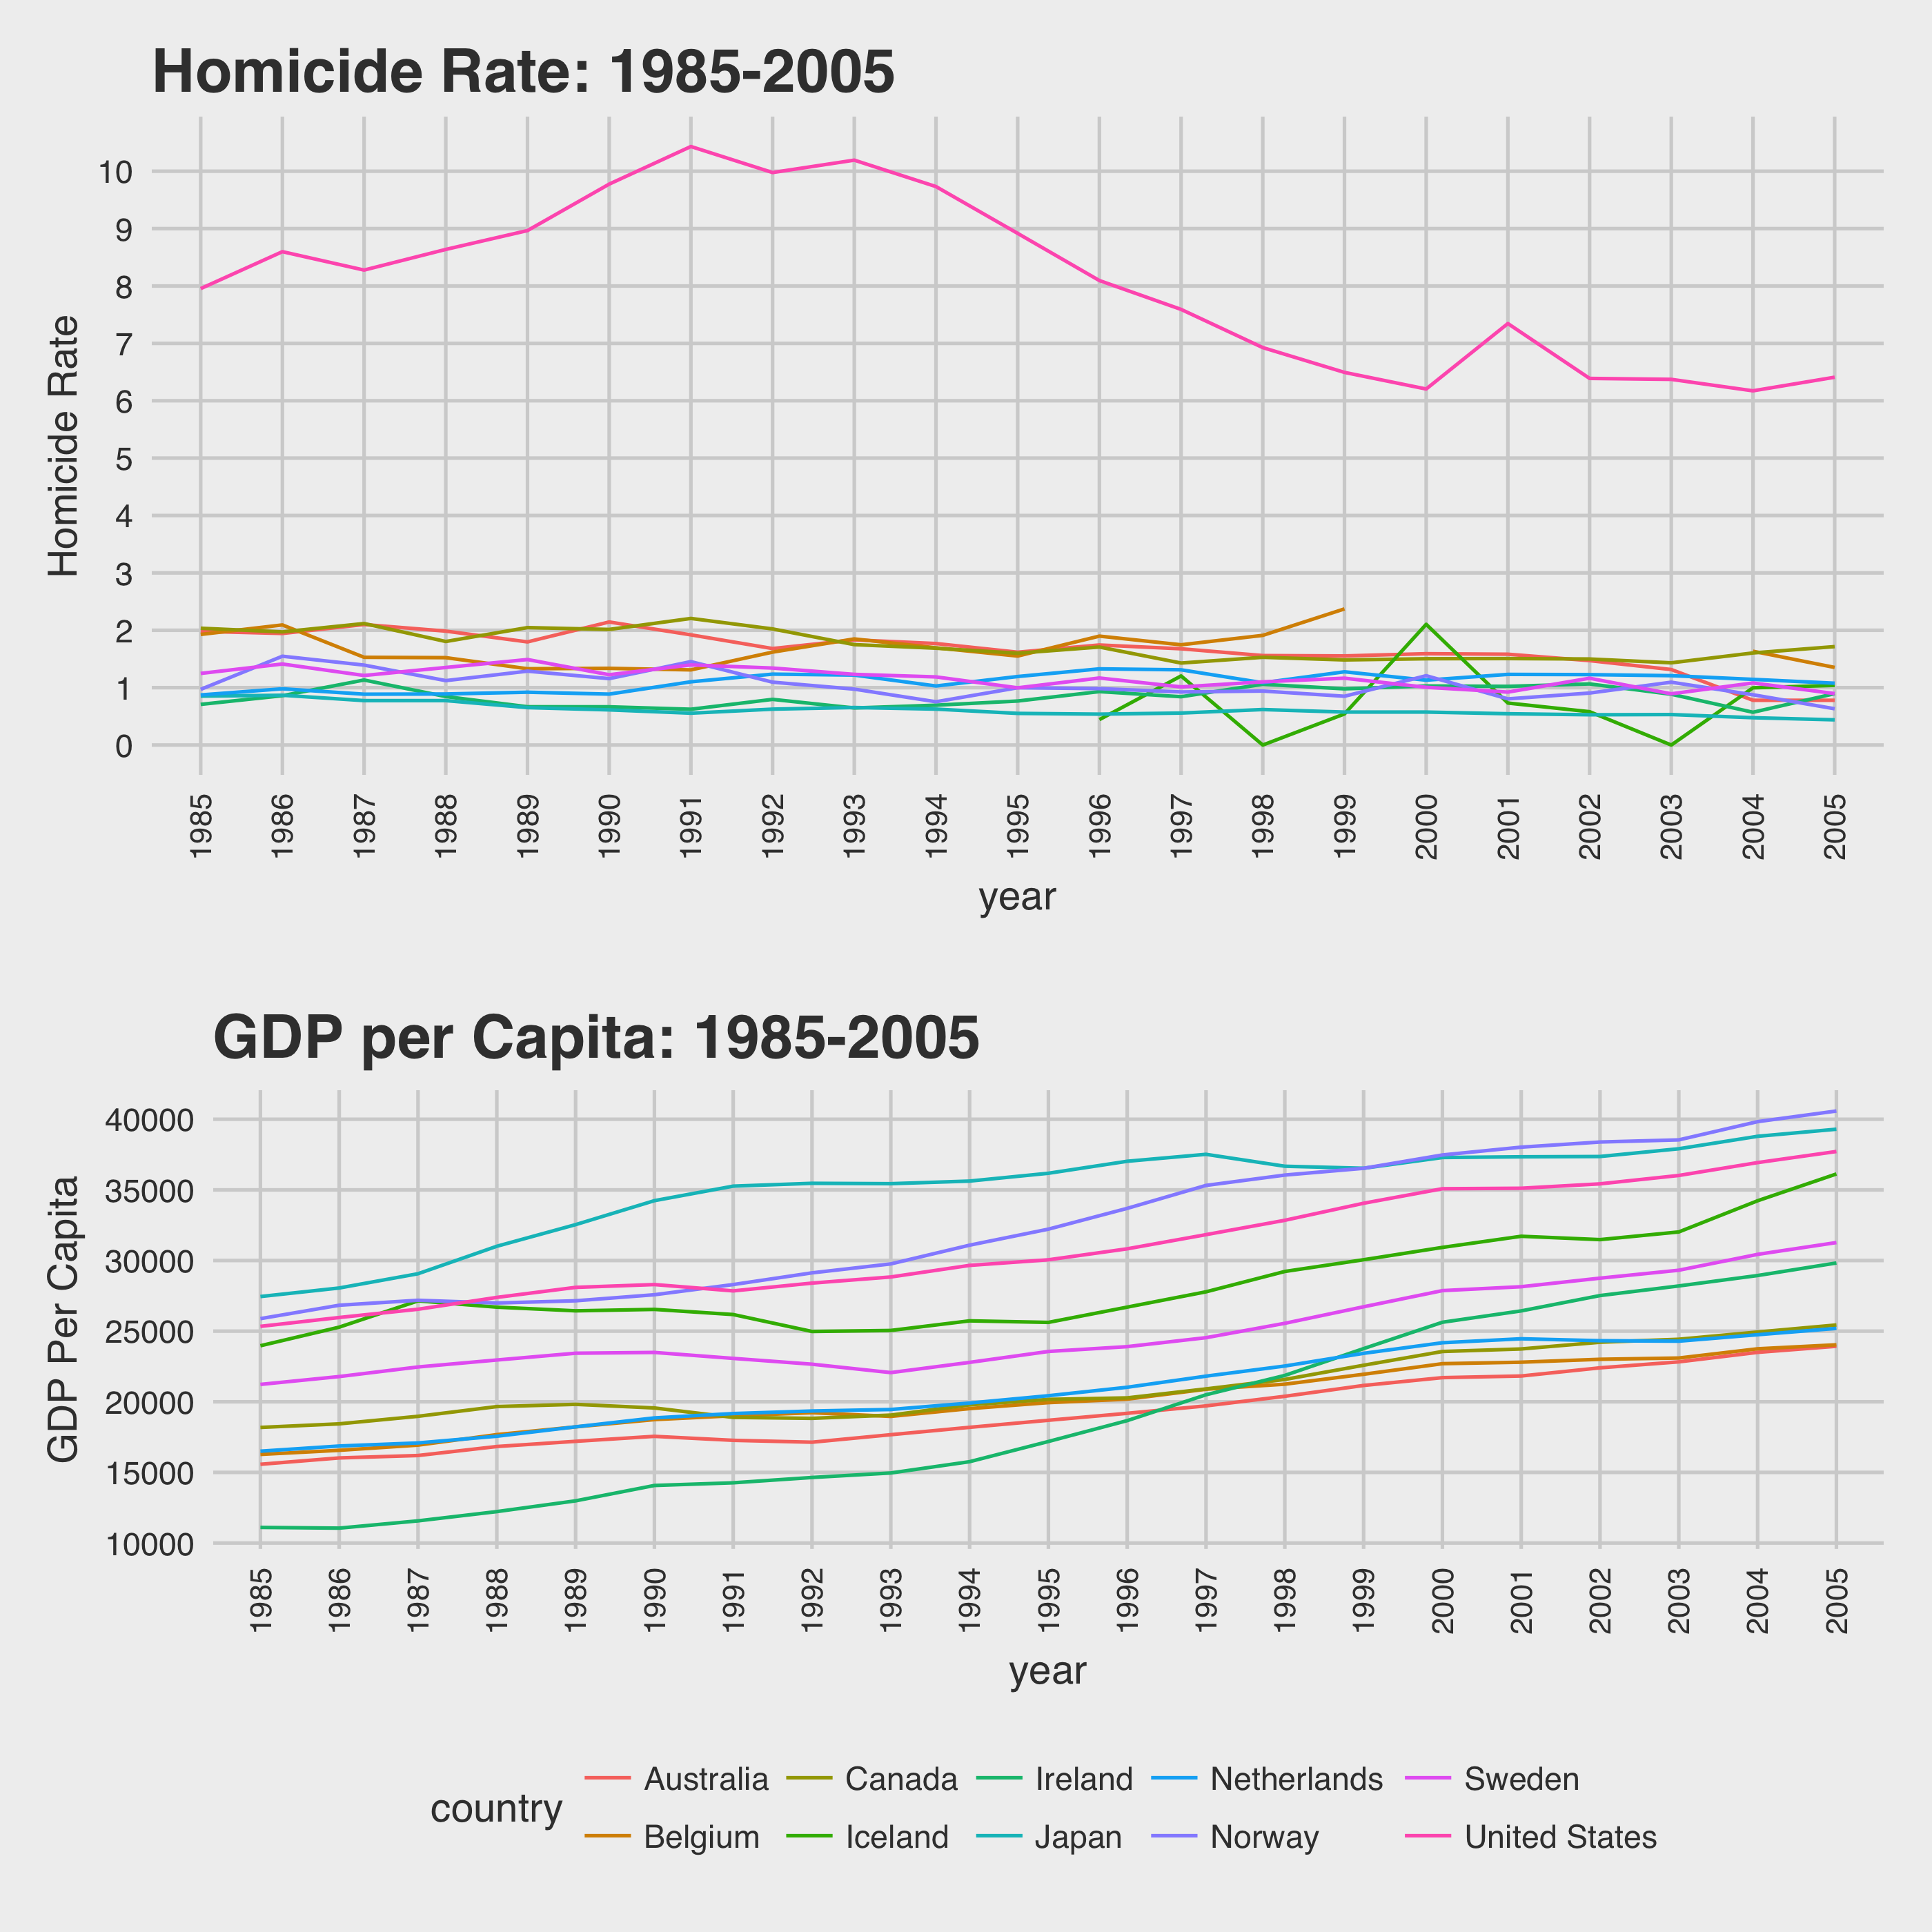

In [29]:
# Set plot options
options(repr.plot.width=8, repr.plot.height=8,repr.plot.res = 350, repr.plot.quality = 100)

# create line plot to get a sense of the data
p1 <- ggplot(df, aes(year, crime_rate, group=country, colour=country)) +
  geom_line(show.legend = FALSE) +
  scale_y_continuous(breaks = seq(0,11,1)) +
  theme_fivethirtyeight() +
  theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=9)) +
  labs(title='Homicide Rate: 1985-2005') +
    theme(axis.title = element_text()) + 
    ylab('Homicide Rate')

# create line plot to get a sense of the data
p2 <- ggplot(df, aes(year, income, group=country, colour=country)) +
  geom_line() +
  scale_y_continuous(breaks = seq(10000,40000,5000)) +
  theme_fivethirtyeight() +
  theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=9)) +
  labs(title='GDP per Capita: 1985-2005') +
    theme(axis.title = element_text()) + 
    ylab('GDP Per Capita')
  
grid.arrange(p1, p2, ncol=1)

Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”

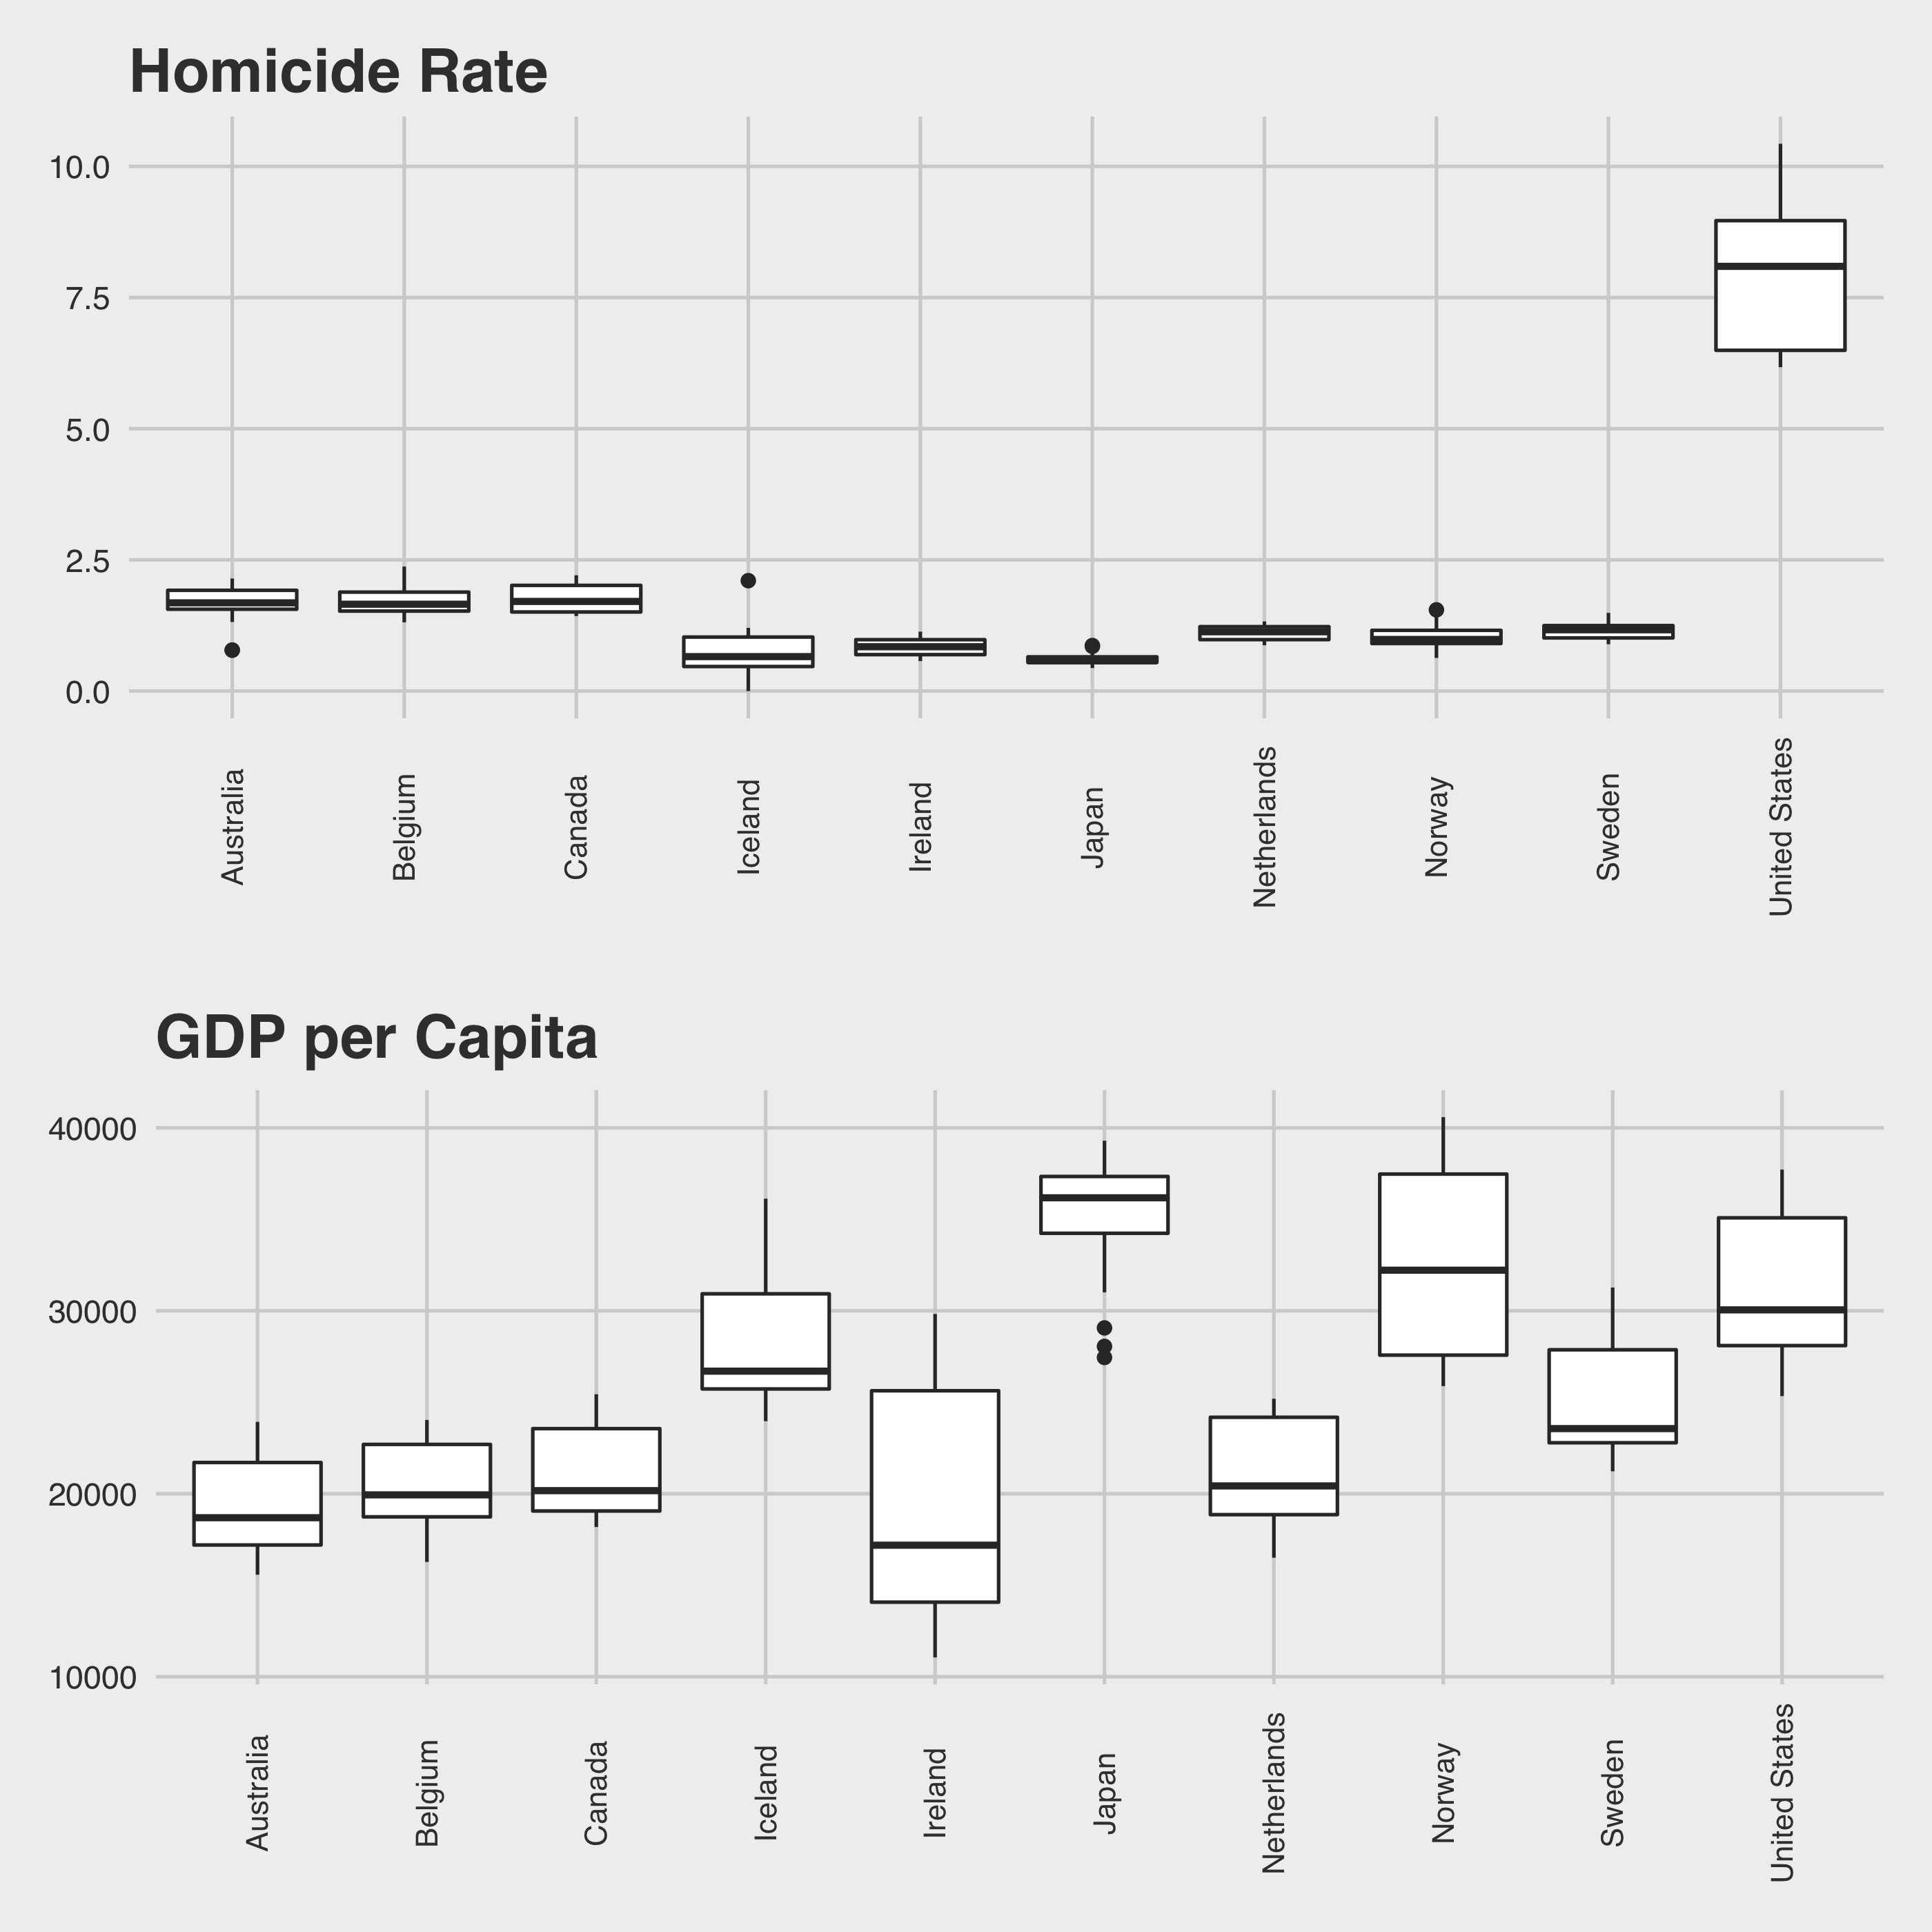

In [9]:
# boxplot to show distribution
p3 <- ggplot(df, aes(country, crime_rate)) +
  geom_boxplot() +
  theme_fivethirtyeight() +
  theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=9)) +
  labs(title='Homicide Rate')

p4 <- ggplot(df, aes(country, income)) +
  geom_boxplot() +
  theme_fivethirtyeight() +
  theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=9)) +
  labs(title='GDP per Capita')

grid.arrange(p3, p4, ncol=1)

## Average Income and Homicide rates per country

In [36]:
# create a new data frame with Mean and Median summary information

avg_df <- df %>%
  group_by(country) %>%
  summarise(mean_crime_rate = mean(crime_rate, na.rm = TRUE),
            median_crime_rate = median(crime_rate,na.rm = TRUE),
            mean_income = mean(income, na.rm = TRUE),
            median_income = median(income,na.rm = TRUE),
            n = n()) %>%
  arrange(mean_crime_rate)

head(avg_df)

country,mean_crime_rate,median_crime_rate,mean_income,median_income,n
Japan,0.6157667,0.5748762,35051.15,36177.03,21
Iceland,0.7643458,0.6564732,28280.47,26700.68,21
Ireland,0.8423550,0.8447790,19102.99,17188.39,21
Norway,1.0465800,0.9835143,32692.40,32219.96,21
Netherlands,1.1066506,1.1304920,20923.78,20428.59,21
Sweden,1.1669621,1.1682510,25048.24,23561.67,21


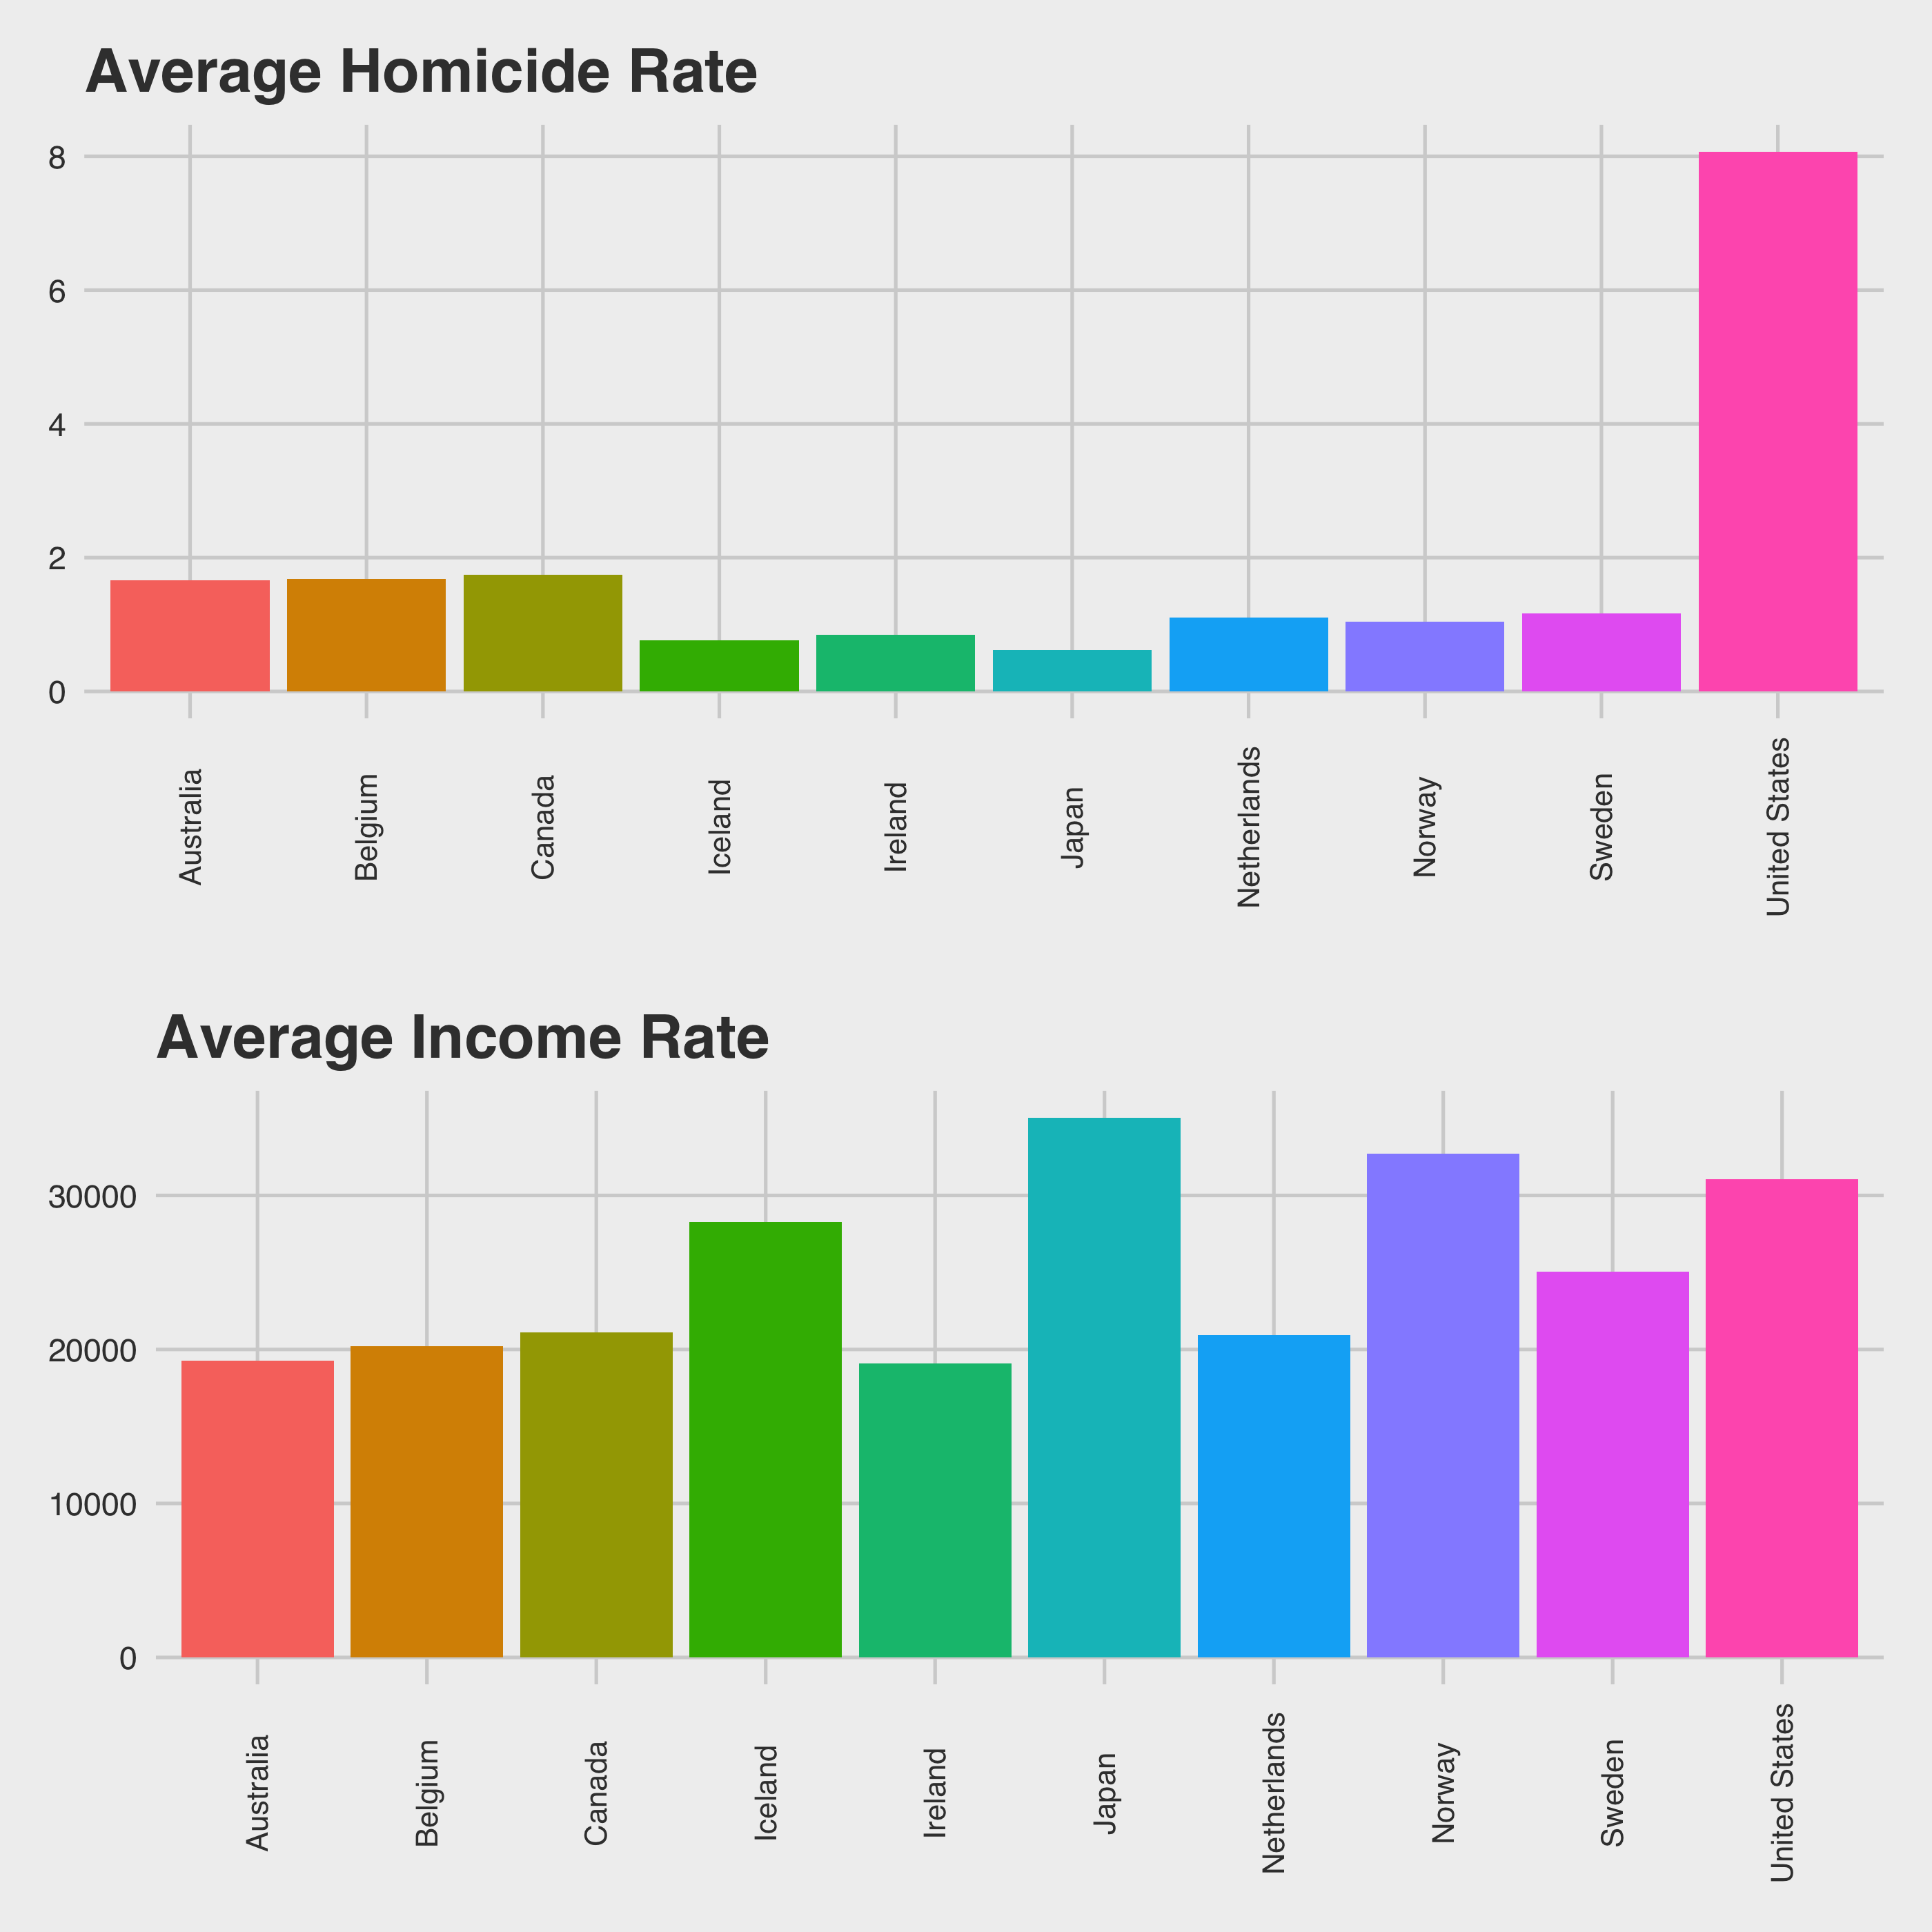

In [12]:
# bar plot to show average crime rate
p5 <- ggplot(avg_df, aes(country, mean_crime_rate, fill = country)) +
  geom_bar(stat = 'identity', show.legend = FALSE) +
  theme_fivethirtyeight() +
  theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=9)) +
  labs(title='Average Homicide Rate')

p6 <- ggplot(avg_df, aes(country, mean_income, fill = country)) +
  geom_bar(stat = 'identity', show.legend = FALSE) +
  theme_fivethirtyeight() +
  theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=9)) +
  labs(title='Average Income Rate')

grid.arrange(p5,p6,ncol=1)

## Check the relationship between Crime Rate and GDP per Capita

Use a scatter plot to visualise

Warning message:
“Removed 14 rows containing missing values (geom_point).”

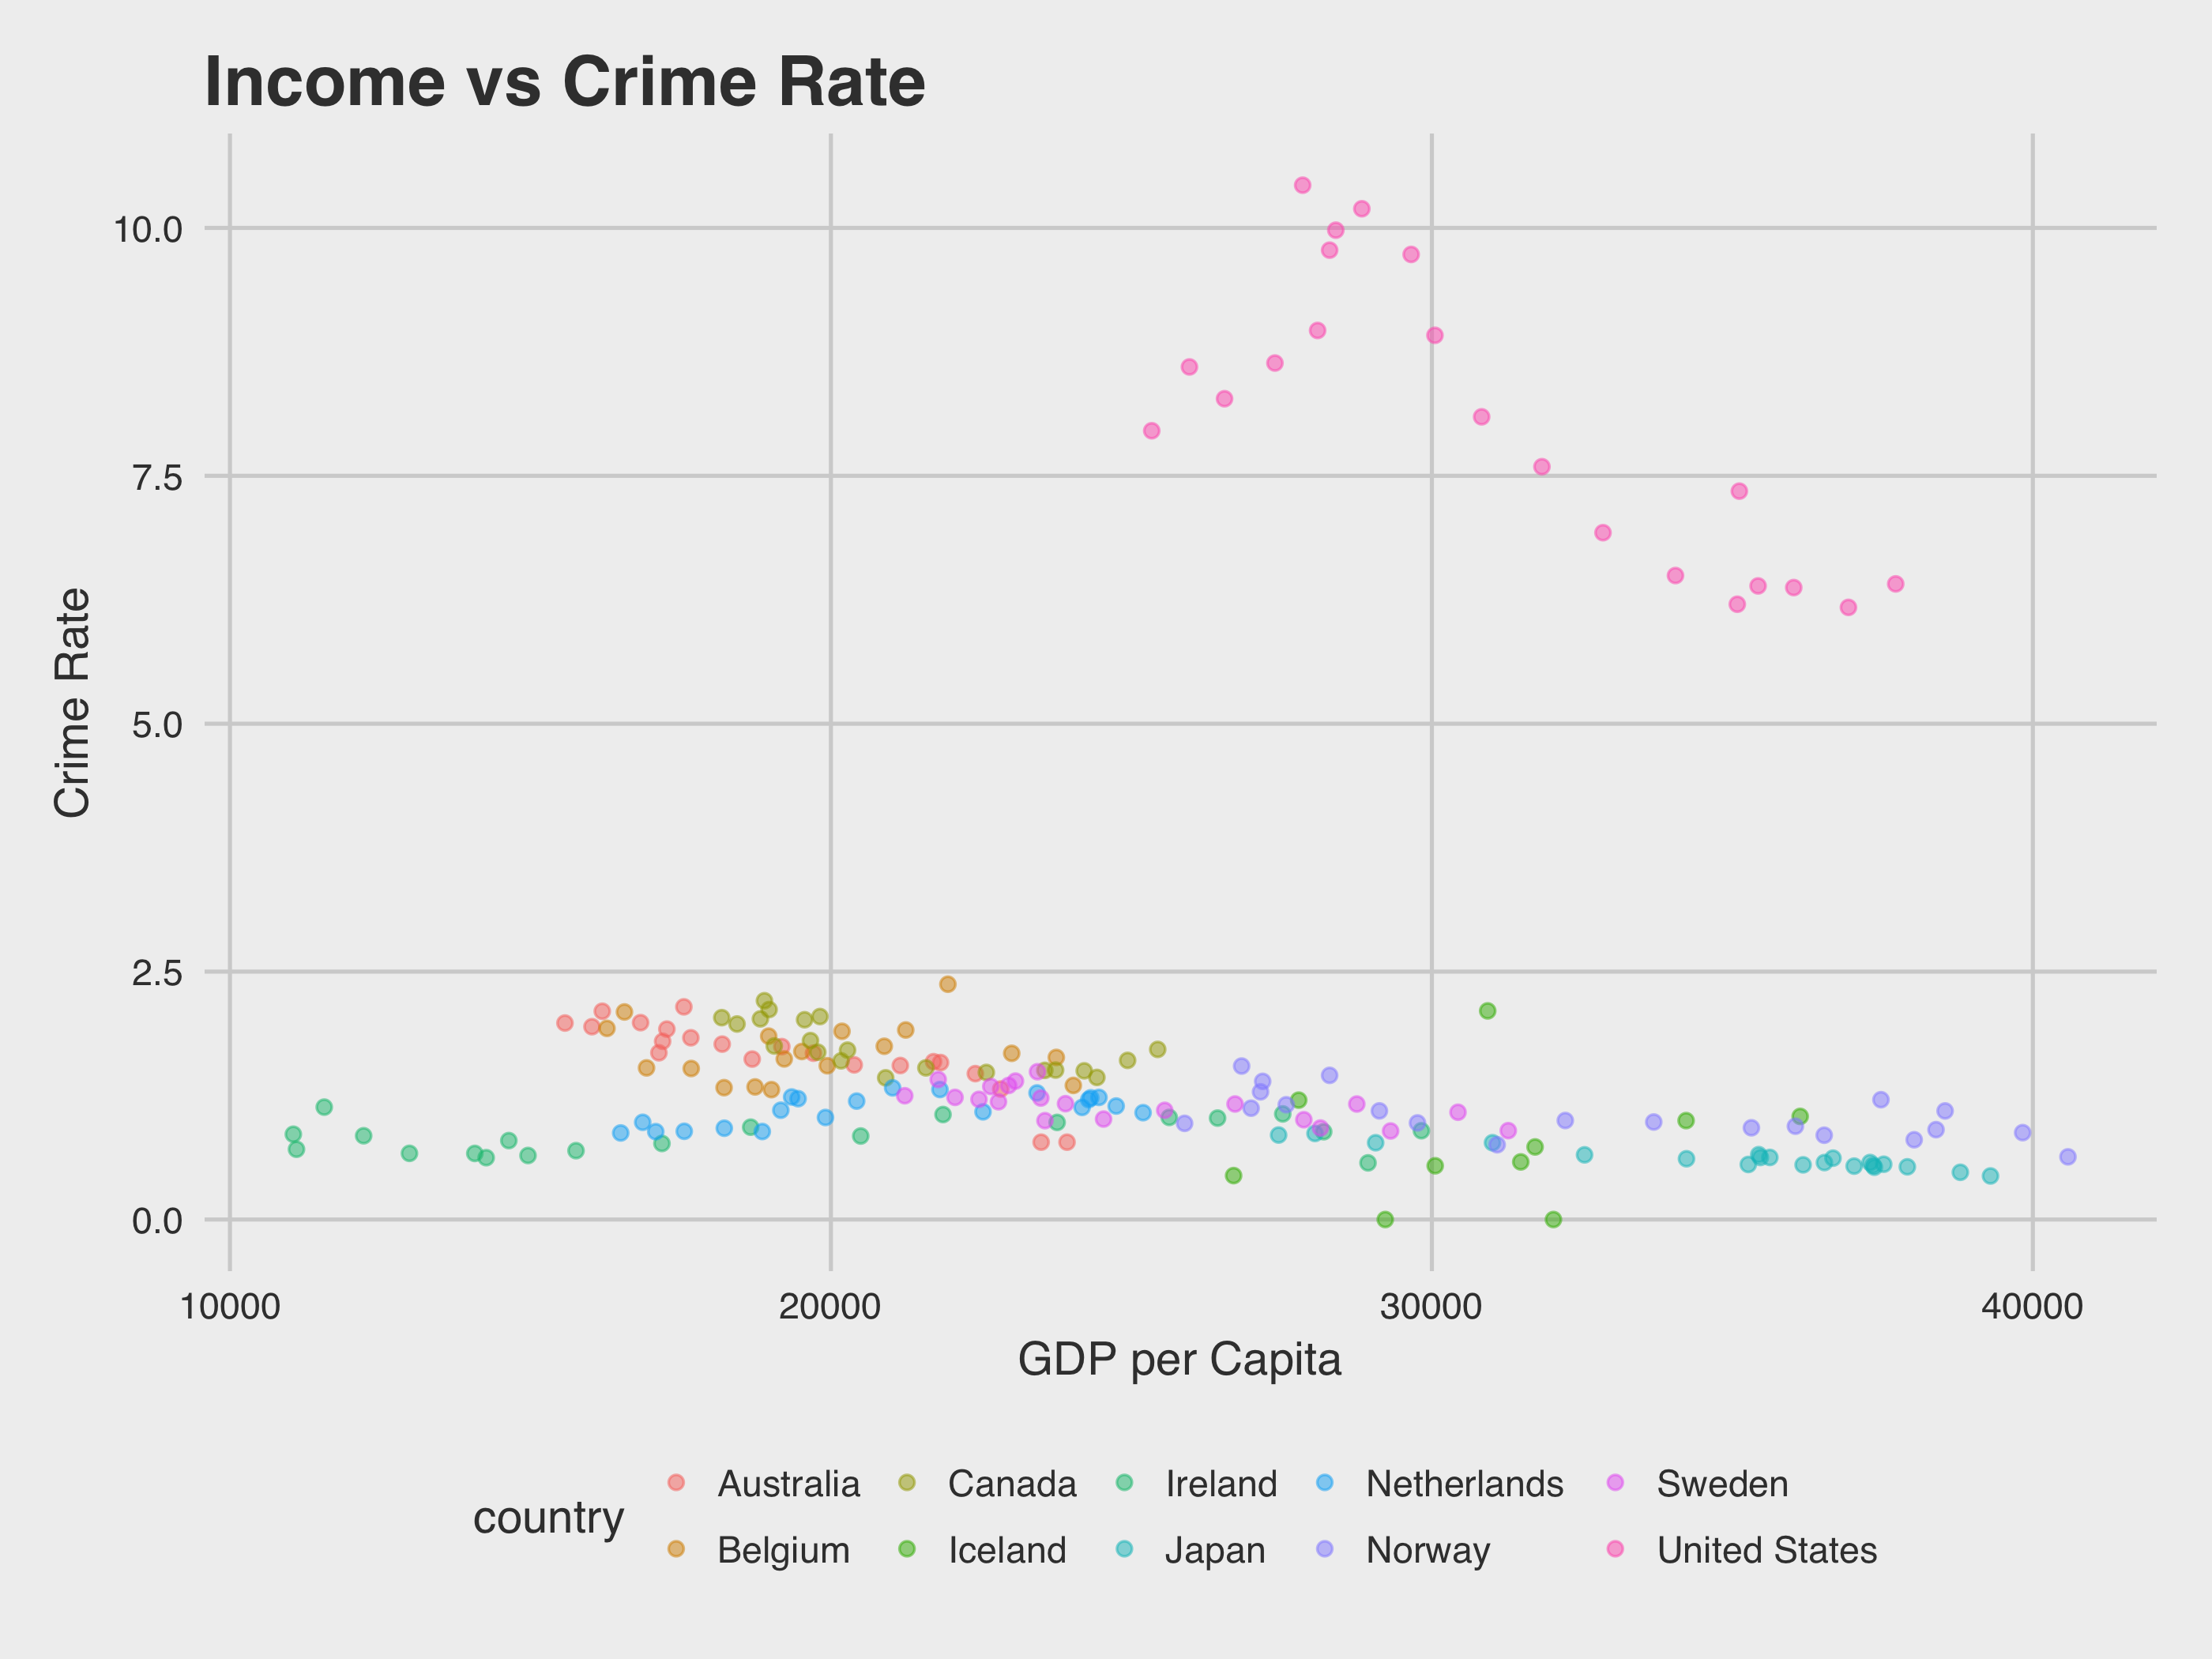

In [30]:
# scatter plot income vs crime rate
ggplot(df, aes(income, crime_rate, colour=country)) +
  geom_point(alpha=1/2) +
  theme_fivethirtyeight() +
  labs(title='Income vs Crime Rate') +
    theme(axis.title = element_text()) + 
    ylab('Crime Rate') +
    xlab('GDP per Capita')

It would seem here that the US is massively skewing the data. For all other countries, there seems to be a similar correlation between income and crime rate. Something could be said for the US data though - the highest crime rates are evident for the middle class.  

Check the Correlation between *crime rate* and *income* with **and** without the US data to see if there is a difference.

<img src="cor.png" align="center">

In [31]:
# create variables
cr <- df$crime_rate
inc <- df$income

# run correlation
cor.test(cr,inc, method='pearson')


	Pearson's product-moment correlation

data:  cr and inc
t = 2.0065, df = 194, p-value = 0.04619
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.002484109 0.277200233
sample estimates:
      cor 
0.1425871 


This indicates a weak correlation between the two variables. I think that the data from the US is what is causing this as it sits outside of the general trend of the other Countries' data. What if we remove the US?

Warning message:
“Removed 14 rows containing missing values (geom_point).”

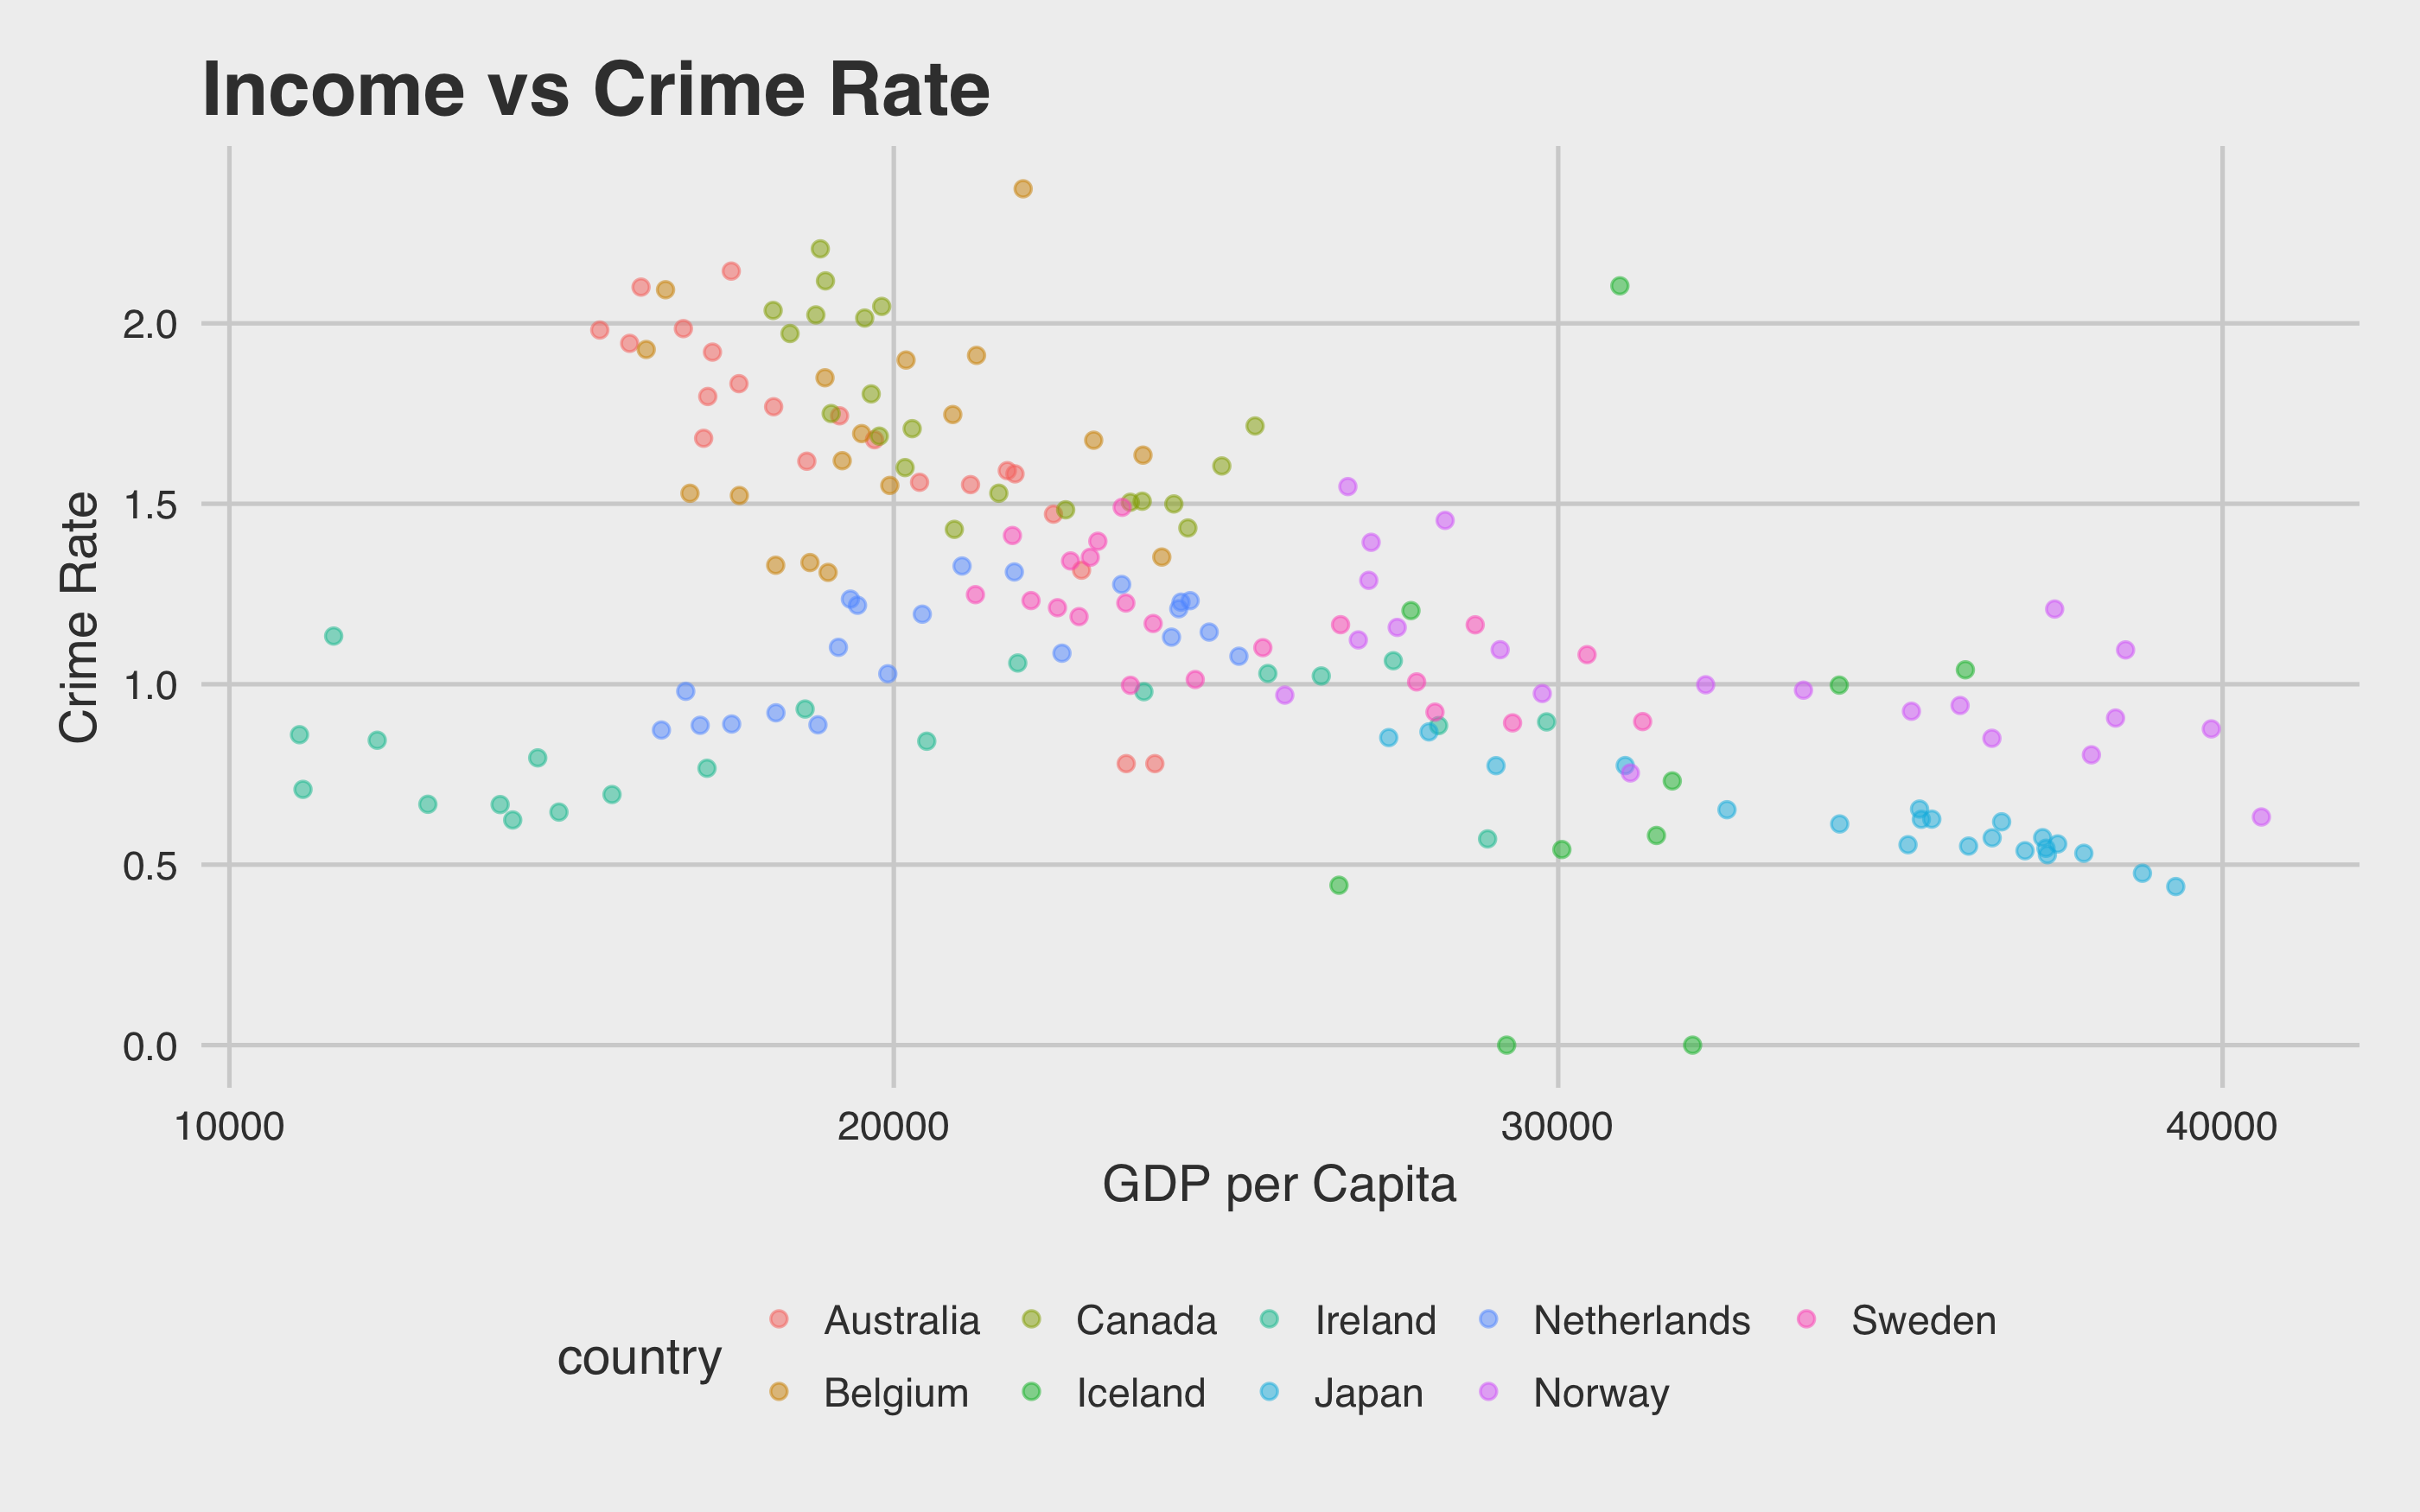

In [35]:
# Subset data to remove US
df_exc_us <- subset(df, country != 'United States')

# Plot this to check what it looks like sans US
# scatter plot income vs crime rate
ggplot(df_exc_us, aes(income, crime_rate, colour=country)) +
  geom_point(alpha=1/2) +
  theme_fivethirtyeight() +
  labs(title='Income vs Crime Rate') +
    theme(axis.title = element_text()) + 
    ylab('Crime Rate') +
    xlab('GDP per Capita')

In [33]:
# Re-run correlation 
cr_2 <- df_exc_us$crime_rate
inc_2 <- df_exc_us$income

cor.test(cr_2,inc_2, method='pearson')


	Pearson's product-moment correlation

data:  cr_2 and inc_2
t = -8.1847, df = 173, p-value = 5.721e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6274969 -0.4123048
sample estimates:
       cor 
-0.5283337 


This shows a much stronger relationship, -0.5 indicates that crime rate decreases as income increases. Countries with higher income have a lower rate of crime. Crime rate increases for lower income earning brackets, around $15,000 we can see a sharp peak in the data. 

This analysis formed part of the ***Data Analyst Nanodegree*** from **Udacity** 
<br>
https://www.udacity.com/course/data-analyst-nanodegree--nd002